In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
mrda_data = pd.read_csv("MRDA_data.csv")
mrda_data

In [64]:
def transition_matrix(transitions):
    n = 1+ max(transitions) #number of states

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

{'S': 0, 'Q': 1, 'F': 2, 'B': 3, 'D': 4}
[[0.60191802 0.05849018 0.06797129 0.1455171  0.1261034 ]
 [0.59252363 0.11959324 0.05084503 0.06688628 0.17015182]
 [0.59363008 0.07239703 0.10744436 0.080967   0.14556152]
 [0.56142271 0.05088919 0.08358413 0.18119015 0.12291382]
 [0.59004674 0.07430575 0.07107506 0.10475667 0.15981578]]


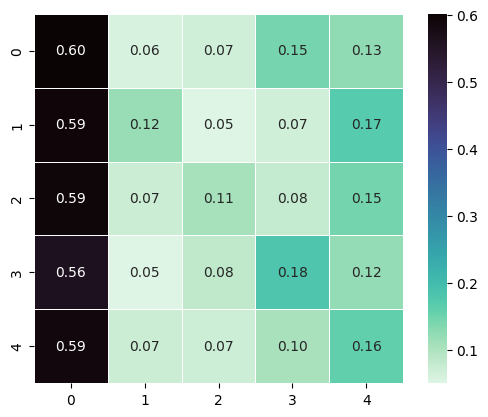

[[1.01394506 0.90630888 0.94073033 1.0769659  0.93790491]
 [0.99812    1.85310436 0.70370094 0.49502251 1.26551877]
 [0.99998385 1.12179632 1.48704202 0.59923333 1.08262635]
 [0.94572976 0.78853107 1.15681379 1.34098062 0.91418207]
 [0.99394762 1.15137196 0.98368686 0.77529965 1.18864361]]


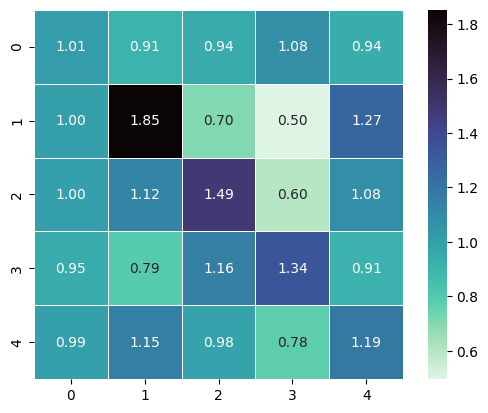

In [97]:
transitions = mrda_data["Basic"].copy()

# print(transitions[0:10])
states = set(transitions)
# print(states)
ids = {k: 0 + i for i, k in enumerate(states)}
print(ids)
transitions = transitions.map(ids)
# print(transitions[0:10])

counts = transitions.value_counts().sort_index()
frequencies = counts/counts.sum()
# print(counts)
# print(frequencies)

transition = np.array(transition_matrix(transitions))

print(transition)

ax1 = sns.heatmap(transition, square=True, annot=True,fmt=".2f",linewidth=.5,cmap="mako_r")
plt.show()

normalized = transition/np.array(frequencies)[None,:]
print(normalized)

ax2 = sns.heatmap(normalized, square=True, annot=True,fmt=".2f",linewidth=.5,cmap="mako_r")
plt.show()